# 1.Data import

In [1]:
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.cloud.bigquery import Dataset

client = bigquery.Client()


In [2]:
QUERY = (
    """SELECT unique_client_id, 
    visitNumber, 
    channelgrouping, 
    device, 
    date, 
    transaction, 
    revenue    
     FROM `gap-bq-api-2016.attribution_modeling.13_step` 
     where unique_client_id in (select unique_client_id from `gap-bq-api-2016.attribution_modeling.13_step` 
     where visitNumber = 1)
     """)


In [3]:
projectid = "gap-bq-api-2016"
df = pd.read_gbq(QUERY, projectid, dialect='standard')

Requesting query... ok.
Job ID: job_xK09_nE1Ha3ft7eSX-f7RSZFszKk
Query running...
  Elapsed 15.33 s. Waiting...
  Elapsed 25.76 s. Waiting...
  Elapsed 36.23 s. Waiting...
Query done.
Processed: 169.9 MB
Standard price: $0.00 USD

Retrieving results...
  Got page: 1; 3% done. Elapsed 48.55 s.
  Got page: 2; 7% done. Elapsed 53.63 s.
  Got page: 3; 10% done. Elapsed 58.62 s.
  Got page: 4; 13% done. Elapsed 63.76 s.
  Got page: 5; 17% done. Elapsed 68.66 s.
  Got page: 6; 20% done. Elapsed 74.3 s.
  Got page: 7; 23% done. Elapsed 79.53 s.
  Got page: 8; 27% done. Elapsed 84.96 s.
  Got page: 9; 30% done. Elapsed 90.25 s.
  Got page: 10; 33% done. Elapsed 94.43 s.
  Got page: 11; 37% done. Elapsed 99.85 s.
  Got page: 12; 40% done. Elapsed 105.66 s.
  Got page: 13; 43% done. Elapsed 111.81 s.
  Got page: 14; 47% done. Elapsed 117.63 s.
  Got page: 15; 50% done. Elapsed 122.63 s.
  Got page: 16; 53% done. Elapsed 127.97 s.
  Got page: 17; 57% done. Elapsed 132.68 s.
  Got page: 18; 60% do

In [4]:
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue
0,7715829377779979615,1,Organic Search,mobile,20171125,0,0.0
1,7715829377779979615,2,Organic Search,mobile,20171125,0,0.0
2,7715829377779979615,3,Organic Search,mobile,20171125,0,0.0
3,7718000488043111562,2,Organic Search,desktop,20171125,0,0.0
4,7718000488043111562,3,Organic Search,desktop,20171125,0,0.0


In [5]:
df=df.sort_values(['transaction'], ascending=False)
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue
1083227,870989493347657664,3,Email,desktop,20171124,4,224.76
1411978,441220690452921806,2,Email,desktop,20171105,4,146.52
215266,684179504259983926,6,Local Listing,desktop,20171111,3,123.51
1408878,2443716846814171522,2,Email,tablet,20171105,3,112.39
156084,5737746296563898804,1,Organic Search,desktop,20171106,3,845.63


In [6]:
df[df['transaction'] > 1]

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue
1083227,870989493347657664,3,Email,desktop,20171124,4,224.76
1411978,441220690452921806,2,Email,desktop,20171105,4,146.52
215266,684179504259983926,6,Local Listing,desktop,20171111,3,123.51
1408878,2443716846814171522,2,Email,tablet,20171105,3,112.39
156084,5737746296563898804,1,Organic Search,desktop,20171106,3,845.63
1423879,3369568219369670651,5,Email,desktop,20171106,3,250.47
1477951,4807362191617116113,1,Email,mobile,20171102,3,57.36
1433765,8601624923259048867,2,Email,desktop,20171106,3,144.23
763670,6486729069036024513,4,Direct,desktop,20171127,3,67.77
785461,6590481047817839826,1,Direct,tablet,20171130,3,57.42


# 2. Summary statistics 

In [7]:
# Libraries used
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


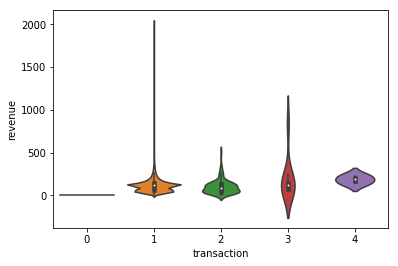

In [8]:
sns.violinplot(x="transaction", y="revenue", data=df)


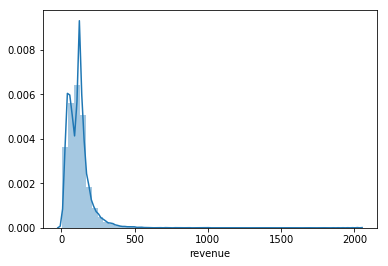

In [9]:
sns.distplot( df[df["transaction"] == 1]["revenue"], )

In [10]:
df.describe()

,visitNumber,transaction,revenue
count,1.497780e+06,1.497780e+06,1.497780e+06
mean,1.744267e+00,8.582035e-03,9.879272e-01
std,2.077359e+00,9.336326e-02,1.285067e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,0.000000e+00,0.000000e+00
max,9.400000e+01,4.000000e+00,2.024570e+03


In [188]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

In [11]:
df.std()

visitNumber     2.077359
transaction     0.093363
revenue        12.850666
dtype: float64

In [ ]:
%matplotlib inline
pd.crosstab(df.channelgrouping,df.revenue).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [187]:
# par channel

pd.crosstab(df['revenue'], df['channelgrouping'])


channelgrouping,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social
revenue,,,,,,,,,,
0.00,22,9022,176100,221133,556609,12968,218700,244906,18388,27219
4.51,0,0,2,0,0,0,0,0,0,0
4.59,0,0,0,1,0,0,0,0,0,0
5.58,0,0,0,0,1,0,0,0,0,0
5.64,0,0,0,0,1,0,0,0,0,0
5.74,0,0,0,0,1,0,0,1,0,0
6.72,0,0,0,0,1,0,0,0,0,0
6.83,0,0,1,0,1,0,0,0,0,0
7.45,0,0,1,0,0,0,0,0,0,0


In [13]:
# par device
pd.crosstab(df['transaction'], df['device'], rownames=['transaction'])

device,desktop,mobile,tablet
transaction,,,
0,493812,687236,304019
1,7104,3024,2457
2,70,21,26
3,6,1,2
4,2,0,0


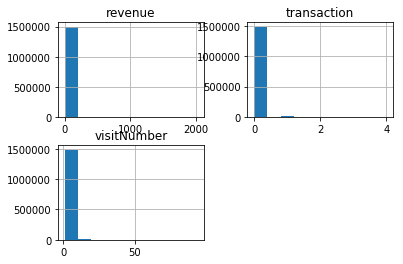

In [14]:
df.hist()
pl.show()

In [15]:
df.groupby('transaction').mean()

,visitNumber,revenue
transaction,,
0,1.750526,0.000000
1,1.000000,116.457894
2,2.282051,101.915812
3,2.555556,197.737778
4,2.500000,185.640000


# 3. Preprocessing

## a. Replace missing values
http://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php

In [16]:
df.isnull().sum()

unique_client_id    0
visitNumber         0
channelgrouping     0
device              0
date                0
transaction         0
revenue             0
dtype: int64

In [17]:
df.dropna()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue
1083227,870989493347657664,3,Email,desktop,20171124,4,224.76
1411978,441220690452921806,2,Email,desktop,20171105,4,146.52
215266,684179504259983926,6,Local Listing,desktop,20171111,3,123.51
1408878,2443716846814171522,2,Email,tablet,20171105,3,112.39
156084,5737746296563898804,1,Organic Search,desktop,20171106,3,845.63
1423879,3369568219369670651,5,Email,desktop,20171106,3,250.47
1477951,4807362191617116113,1,Email,mobile,20171102,3,57.36
1433765,8601624923259048867,2,Email,desktop,20171106,3,144.23
763670,6486729069036024513,4,Direct,desktop,20171127,3,67.77
785461,6590481047817839826,1,Direct,tablet,20171130,3,57.42


## b. Transaction distribution

In [18]:
df['transaction'].value_counts()

0    1485067
1      12585
2        117
3          9
4          2
Name: transaction, dtype: int64

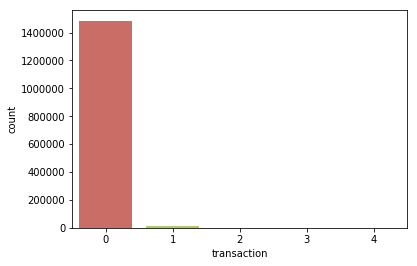

In [19]:
sns.countplot(x='transaction', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [20]:
a = ['2' , '3', '4']
df = df[~df['transaction'].isin(a)]

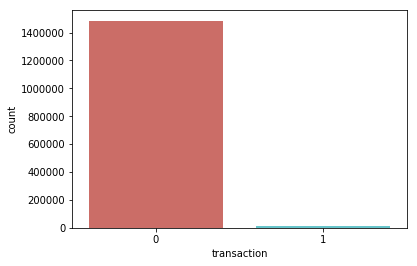

In [21]:
sns.countplot(x='transaction', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

## b. Create new variables

In [22]:
# create new columns to compute days before conversion or not for survival analysis
df['date_min']=df.groupby(['unique_client_id'])['date'].transform(min)
df['date_max']=df['date'].max()
df['date_survie'] = np.where(df['transaction']==1, df['date'], df['date'].max())
df['datediff'] = df['date_survie'].astype(int) - df['date_min'].astype(int)
df.dtypes
df.head()


,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
683994,7876728804126515024,1,Display,mobile,20171115,1,64.27,20171115,20171130,20171115,0
811474,6494582670139698536,1,Direct,desktop,20171122,1,132.07,20171122,20171130,20171122,0
463884,4463537458140705697,1,Affiliates,mobile,20171130,1,88.72,20171130,20171130,20171130,0
1133638,6399326518922153723,1,Email,mobile,20171123,1,99.55,20171123,20171130,20171123,0
962176,5289644412884497520,1,Email,tablet,20171127,1,31.43,20171127,20171130,20171127,0


In [23]:
df=df.sort_values(['datediff'], ascending=False)
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
1168789,339280393239140472,4,Email,mobile,20171121,0,0.0,20171101,20171130,20171130,29
536782,5656986106646375124,1,Referral,desktop,20171101,0,0.0,20171101,20171130,20171130,29
536908,7231341553367249029,1,Referral,desktop,20171101,0,0.0,20171101,20171130,20171130,29
536909,7255786046199850879,1,Referral,mobile,20171101,0,0.0,20171101,20171130,20171130,29
536910,7260947115125887351,2,Referral,desktop,20171101,0,0.0,20171101,20171130,20171130,29


In [24]:
df=df.sort_values(['visitNumber'], ascending=False)
df.head()

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
904238,4986027376522167690,94,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904237,4986027376522167690,93,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904236,4986027376522167690,92,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904235,4986027376522167690,91,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904234,4986027376522167690,90,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29


In [25]:
customer_filter = ['4986027376522167690']
df[df.unique_client_id.isin(customer_filter)]

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
904238,4986027376522167690,94,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904237,4986027376522167690,93,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904236,4986027376522167690,92,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904235,4986027376522167690,91,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904234,4986027376522167690,90,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904233,4986027376522167690,89,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904232,4986027376522167690,88,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904231,4986027376522167690,87,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904230,4986027376522167690,86,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29
904229,4986027376522167690,85,Email,tablet,20171130,0,0.0,20171101,20171130,20171130,29


In [26]:
# create pivot on channel/device/transactions

df_trim_pt_channel = pd.pivot_table(df, index='unique_client_id', columns = 'channelgrouping', values = 'visitNumber', fill_value=0, aggfunc='count')
df_trim_pt_device = pd.pivot_table(df, index='unique_client_id', columns = 'device', values = 'visitNumber', fill_value=0, aggfunc='count')
df_trim_pt_transactions = pd.pivot_table(df, index='unique_client_id', values = ['transaction','revenue'], fill_value=0, aggfunc=np.sum)
df_trim_pt_date = pd.pivot_table(df, index='unique_client_id', values = 'datediff', fill_value=0, aggfunc=np.max)
df_trim_pt_visits = pd.pivot_table(df, index='unique_client_id', values = 'visitNumber', fill_value=0, aggfunc='count')

In [27]:
training = pd.concat([df_trim_pt_visits,df_trim_pt_channel,df_trim_pt_device,df_trim_pt_transactions,df_trim_pt_date], axis = 1) #concatenate pivot
training=training.sort_values(['visitNumber'], ascending=False)
training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff
unique_client_id,,,,,,,,,,,,,,,,,
4986027376522167690,96,0,0,0,0,95,0,0,0,1,0,0,0,96,0.0,0,29
9114323806561488965,83,0,0,10,0,22,0,51,0,0,0,0,83,0,0.0,0,28
4088039900651840070,80,0,0,0,0,0,0,80,0,0,0,80,0,0,0.0,0,29
6430065840376044779,79,0,0,58,21,0,0,0,0,0,0,79,0,0,0.0,0,27
7085191581585861209,72,0,0,0,0,0,0,72,0,0,0,72,0,0,0.0,0,22


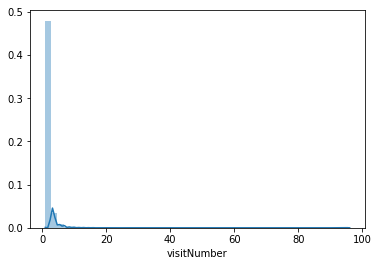

In [28]:
sns.distplot(training["visitNumber"])


#### On retire les observations ayant plus de 30 visites sur la période

In [29]:
training = training[training.visitNumber < 30]

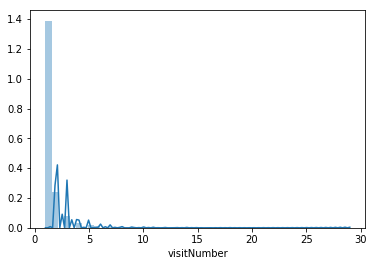

In [30]:
sns.distplot(training["visitNumber"])

In [31]:
training=training.sort_values(['datediff'], ascending=False)
training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff
unique_client_id,,,,,,,,,,,,,,,,,
1065735817491257018,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0,29
2662910292311793684,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0,29
9109611879545325330,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,0,29
8286663108743279583,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,0,29
189420716531787692,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0,29


In [32]:
customer_filter = ['8019998536456594134']
df[df.unique_client_id.isin(customer_filter)]

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
546951,8019998536456594134,4,Referral,mobile,20171122,0,0.0,20171101,20171130,20171130,29
1111670,8019998536456594134,3,Email,mobile,20171122,0,0.0,20171101,20171130,20171130,29
1432668,8019998536456594134,2,Email,mobile,20171106,0,0.0,20171101,20171130,20171130,29
1465529,8019998536456594134,1,Email,mobile,20171101,0,0.0,20171101,20171130,20171130,29


In [33]:
training=training.sort_values(['revenue'], ascending=False)
training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff
unique_client_id,,,,,,,,,,,,,,,,,
17162961409513045,2,0,0,0,0,0,0,0,2,0,0,0,2,0,2024.57,1,4
160590100018623352,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1010.06,1,0
4217174814031882975,1,0,0,1,0,0,0,0,0,0,0,1,0,0,998.95,1,0
3174845212601835000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,978.18,1,0
7983238293644600704,1,0,0,0,0,0,0,1,0,0,0,1,0,0,967.13,1,0


In [34]:
customer_filter = ['17162961409513045']
df[df.unique_client_id.isin(customer_filter)]

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
276604,17162961409513045,1,Paid Search,mobile,20171127,1,2024.57,20171126,20171130,20171127,1
264869,17162961409513045,1,Paid Search,mobile,20171126,0,0.00,20171126,20171130,20171130,4


In [35]:
training=training.sort_values(['transaction'], ascending=False)
training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff
unique_client_id,,,,,,,,,,,,,,,,,
13065296289368069,2,0,0,0,0,0,0,2,0,0,0,2,0,0,187.88,2,1
17162961409513045,2,0,0,0,0,0,0,0,2,0,0,0,2,0,2024.57,1,4
950245693090903541,1,0,0,0,0,0,0,0,1,0,0,1,0,0,76.92,1,0
1093761557136691363,1,0,0,0,0,0,0,1,0,0,0,1,0,0,77.10,1,0
2671937287073052684,1,0,0,1,0,0,0,0,0,0,0,1,0,0,77.10,1,0


In [36]:
customer_filter = ['13065296289368069']
df[df.unique_client_id.isin(customer_filter)]

,unique_client_id,visitNumber,channelgrouping,device,date,transaction,revenue,date_min,date_max,date_survie,datediff
23618,13065296289368069,1,Organic Search,desktop,20171128,1,93.94,20171127,20171130,20171128,1
11576,13065296289368069,1,Organic Search,desktop,20171127,1,93.94,20171127,20171130,20171127,0


In [37]:
# Extraction échantillon pour analyse externe
training2=training[:10000]
training2.to_csv('training_sample.csv',sep=',')

## Revalidate transaction distribution

In [38]:
training['transaction'].value_counts()

0    1034107
1      12583
2          1
Name: transaction, dtype: int64

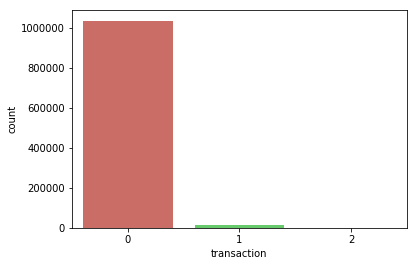

In [39]:
sns.countplot(x='transaction', data=training, palette='hls')
plt.show()
plt.savefig('count_plot')

In [40]:
a = ['2']
training = training[~training['transaction'].isin(a)]

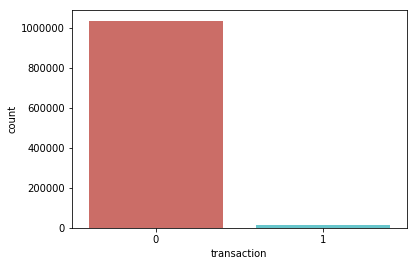

In [41]:
sns.countplot(x='transaction', data=training, palette='hls')
plt.show()
plt.savefig('count_plot')

In [42]:
training=training.sort_values(['transaction'], ascending=False)
training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff
unique_client_id,,,,,,,,,,,,,,,,,
17162961409513045,2,0,0,0,0,0,0,0,2,0,0,0,2,0,2024.57,1,4
3620652943798306073,1,0,0,1,0,0,0,0,0,0,0,1,0,0,492.74,1,0
6005243392405257651,1,0,0,0,0,1,0,0,0,0,0,1,0,0,550.39,1,0
8589374001495458654,1,0,0,0,0,0,0,1,0,0,0,1,0,0,558.13,1,0
3200149338845331249,1,0,0,0,0,1,0,0,0,0,0,1,0,0,721.10,1,0


## c. Add intercept

In [43]:
# Ajout du terme constant
training['intercept'] = 1.0
training.head()

,visitNumber,(Other),Affiliates,Direct,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,transaction,datediff,intercept
unique_client_id,,,,,,,,,,,,,,,,,,
17162961409513045,2,0,0,0,0,0,0,0,2,0,0,0,2,0,2024.57,1,4,1.0
3620652943798306073,1,0,0,1,0,0,0,0,0,0,0,1,0,0,492.74,1,0,1.0
6005243392405257651,1,0,0,0,0,1,0,0,0,0,0,1,0,0,550.39,1,0,1.0
8589374001495458654,1,0,0,0,0,0,0,1,0,0,0,1,0,0,558.13,1,0,1.0
3200149338845331249,1,0,0,0,0,1,0,0,0,0,0,1,0,0,721.10,1,0,1.0


## d. No standardization needed - only binary explicative variables

## e. Create training and testing sample
https://github.com/Einsteinish/bogotobogo-Machine-Learning/blob/master/scikit_machine_learning_Data_Processing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.ipynb

# 4. Logistic Regression

#### Useful links 
Preprocessing
http://www.bogotobogo.com/python/scikit-learn/scikit-learn_logistic_regression.php
Étapes et viz
https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb
Interpretation paramètres
https://www.r-bloggers.com/evaluating-logistic-regression-models/
Full process
http://blog.yhat.com/posts/logistic-regression-python-rodeo.html
Visuals
http://marcharper.codes/2016-06-27/Logistic+Regression.html
Other one
https://github.com/Mashimo/datascience/blob/master/01-Regression/LogisticRegressionSM.ipynb


## Preparation

### a. Import librairies

In [94]:
#Import librairies
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### b. Drop irrelevant variables (uniqe_client_id / visitNumber / othes / direct / revenue / datediff)

In [95]:
training_log = training.drop(['visitNumber', '(Other)', 'Direct', 'revenue', 'datediff'], 1)
training_log.head()

,Affiliates,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,transaction,intercept
unique_client_id,,,,,,,,,,,,,
17162961409513045,0,0,0,0,0,2,0,0,0,2,0,1,1.0
3620652943798306073,0,0,0,0,0,0,0,0,1,0,0,1,1.0
6005243392405257651,0,0,1,0,0,0,0,0,1,0,0,1,1.0
8589374001495458654,0,0,0,0,1,0,0,0,1,0,0,1,1.0
3200149338845331249,0,0,1,0,0,0,0,0,1,0,0,1,1.0


In [96]:
training_log.dtypes

Affiliates          int64
Display             int64
Email               int64
Local Listing       int64
Organic Search      int64
Paid Search         int64
Referral            int64
Social              int64
desktop             int64
mobile              int64
tablet              int64
transaction         int64
intercept         float64
dtype: object

## Recursive feature elimination (RFE) model

In [97]:
training_vars=training_log.columns.values.tolist()
y=['transaction']
X=[i for i in training_vars if i not in y]

In [98]:
# Recursive feature elimination -> Select 'True'

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(training_log[X],training_log[y])
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


## General model - Statsmodels

In [100]:
import statsmodels.api as sm
logit_model=sm.Logit(training_log[y],training_log[X])
result=logit_model.fit(maxiter=1000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.060385
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:            transaction   No. Observations:              1046690
Model:                          Logit   Df Residuals:                  1046678
Method:                           MLE   Df Model:                           11
Date:                Wed, 13 Dec 2017   Pseudo R-squ.:                 0.07239
Time:                        22:38:08   Log-Likelihood:                -63205.
converged:                       True   LL-Null:                       -68137.
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Affiliates        -0.0374      0.082     -0.454      0.650      -0.199       0.124
Display         

#### Inverse relationship between the probability of convering and the presence of several channels in the customer path

In other words, the probability of buying online is higher for visitors coming from Affiliates -> Paid Search -> Organic search -> Email -> Social -> Local Listing -> Referral -> Display 

In [101]:
result.conf_int()

,0,1
Affiliates,-0.198708,0.123946
Display,-1.513783,-1.345232
Email,-0.948858,-0.852063
Local Listing,-1.553579,-1.019698
Organic Search,-0.562324,-0.456543
Paid Search,-0.476607,-0.374755
Referral,-1.731997,-1.236509
Social,-1.153383,-0.805009
desktop,-2.300623,-1.942367
mobile,-3.111593,-2.745223


In [102]:
params = result.params
conf = result.conf_int()
conf['Odds ratio'] = params
conf.columns = ['92.5%', '97.5%', 'Odds Ratio']
print (np.exp(conf))


                   92.5%     97.5%  Odds Ratio
Affiliates      0.819789  1.131954    0.963309
Display         0.220076  0.260479    0.239427
Email           0.387183  0.426534    0.406383
Local Listing   0.211490  0.360704    0.276198
Organic Search  0.569883  0.633470    0.600836
Paid Search     0.620886  0.687458    0.653325
Referral        0.176931  0.290396    0.226672
Social          0.315567  0.447084    0.375613
desktop         0.100196  0.143364    0.119852
mobile          0.044530  0.064234    0.053482
tablet          0.071935  0.103733    0.086383
intercept       0.278173  0.398682    0.333021


## Models with no interaction

### b. All channels

#### Statsmodel

In [105]:
cols1=["Organic Search", "Paid Search", "Affiliates", "Referral", "Email", "Display", "Social", 
      "Local Listing", "intercept"] 
X1=training_log[cols1]
y1=training_log['transaction']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [107]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(maxiter=1000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.061882
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            transaction   No. Observations:               732683
Model:                          Logit   Df Residuals:                   732674
Method:                           MLE   Df Model:                            8
Date:                Wed, 13 Dec 2017   Pseudo R-squ.:                 0.04789
Time:                        22:41:17   Log-Likelihood:                -45340.
converged:                       True   LL-Null:                       -47621.
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Organic Search    -0.7495      0.028    -27.236      0.000      -0.803      -0.696
Paid Search     

In [108]:
result.conf_int()

,0,1
Organic Search,-0.803412,-0.695545
Paid Search,-0.778317,-0.676488
Affiliates,-0.560056,-0.207361
Referral,-1.977574,-1.392231
Email,-1.209380,-1.111284
Display,-1.939515,-1.748765
Social,-1.728967,-1.298095
Local Listing,-1.900138,-1.265871
intercept,-3.469938,-3.401716


In [109]:
params = result.params
conf = result.conf_int()
conf['Odds ratio'] = params
conf.columns = ['92.5%', '97.5%', 'Odds Ratio']
print (np.exp(conf))

                   92.5%     97.5%  Odds Ratio
Organic Search  0.447798  0.498803    0.472613
Paid Search     0.459178  0.508399    0.483162
Affiliates      0.571177  0.812726    0.681330
Referral        0.138405  0.248520    0.185463
Email           0.298382  0.329136    0.313382
Display         0.143774  0.173989    0.158161
Social          0.177468  0.273051    0.220131
Local Listing   0.149548  0.281994    0.205357
intercept       0.031119  0.033316    0.032199


#### Sklearn

In [110]:
# sampling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1000.0, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train, y_train)
print('Training accuracy:', logi_regr.score(X_train, y_train))
print('Test accuracy:', logi_regr.score(X_test, y_test))

Training accuracy: 0.988001632357
Test accuracy: 0.987923836093


In [112]:
logi_regr.intercept_

array([-0.6744759])

In [113]:
logi_regr.coef_

array([[-0.73016286, -0.70870673, -0.29698636, -1.47286804, -1.14084411,
        -1.80762823, -1.38662884, -1.33993538, -2.7792625 ]])

In [114]:
# À prendre pour comparer les odds ratio des deux méthodes
print (np.exp(logi_regr.coef_))

[[ 0.48183051  0.49228044  0.74305415  0.22926699  0.31954917  0.16404275
   0.24991639  0.26186259  0.06208428]]


In [115]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [116]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.988


In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[310215      0]
 [  3792      0]]


In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    310215
          1       0.00      0.00      0.00      3792

avg / total       0.98      0.99      0.98    314007



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


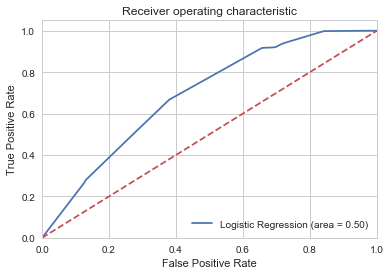

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Interaction terms

In [120]:
# Création de toutes les variables d'interaction
training_log['Email x Paid Search']=training_log['Email'] * training_log['Paid Search']
training_log['Email x Organic Search']=training_log['Email'] * training_log['Organic Search']
training_log['Email x Display']=training_log['Email'] * training_log['Display']
training_log['Email x Social']=training_log['Email'] * training_log['Social']
training_log['Email x Referral']=training_log['Email'] * training_log['Referral']
training_log['Email x Local Listing']=training_log['Email'] * training_log['Local Listing']
training_log['Email x Affiliates']=training_log['Email'] * training_log['Affiliates']
training_log['Paid Search x Organic Search']=training_log['Paid Search'] * training_log['Organic Search']
training_log['Paid Search x Display']=training_log['Paid Search'] * training_log['Display']
training_log['Paid Search x Social']=training_log['Paid Search'] * training_log['Social']
training_log['Paid Search x Referral']=training_log['Paid Search'] * training_log['Referral']
training_log['Paid Search x Local Listing']=training_log['Paid Search'] * training_log['Local Listing']
training_log['Paid Search x Affiliates']=training_log['Paid Search'] * training_log['Affiliates']
training_log['Organic Search x Display']=training_log['Organic Search'] * training_log['Display']
training_log['Organic Search x Social']=training_log['Organic Search'] * training_log['Social']
training_log['Organic Search x Referral']=training_log['Organic Search'] * training_log['Referral']
training_log['Organic Search x Local Listing']=training_log['Organic Search'] * training_log['Local Listing']
training_log['Organic Search x Affiliates']=training_log['Organic Search'] * training_log['Affiliates']
training_log['Display x Social']=training_log['Display'] * training_log['Social']
training_log['Display x Referral']=training_log['Display'] * training_log['Referral']
training_log['Display x Local Listing']=training_log['Display'] * training_log['Local Listing']
training_log['Display x Affiliates']=training_log['Display'] * training_log['Affiliates']
training_log['Social x Referral']=training_log['Social'] * training_log['Referral']
training_log['Social x Local Listing']=training_log['Social'] * training_log['Local Listing']
training_log['Social x Affiliates']=training_log['Social'] * training_log['Affiliates']
training_log['Referral x Local Listing']=training_log['Referral'] * training_log['Local Listing']
training_log['Referral x Affiliates']=training_log['Referral'] * training_log['Affiliates']
training_log['Local Listing x Affiliates']=training_log['Local Listing'] * training_log['Affiliates']
training_log['Email x desktop']=training_log['Email'] * training_log['desktop']
training_log['Email x tablet']=training_log['Email'] * training_log['tablet']
training_log['Email x mobile']=training_log['Email'] * training_log['mobile']
training_log['Paid Search x desktop']=training_log['Paid Search'] * training_log['desktop']
training_log['Paid Search x tablet']=training_log['Paid Search'] * training_log['tablet']
training_log['Paid Search x mobile']=training_log['Paid Search'] * training_log['mobile']
training_log['Organic Search x desktop']=training_log['Organic Search'] * training_log['desktop']
training_log['Organic Search x tablet']=training_log['Organic Search'] * training_log['tablet']
training_log['Organic Search x mobile']=training_log['Organic Search'] * training_log['mobile']
training_log['Display x desktop']=training_log['Display'] * training_log['desktop']
training_log['Display x tablet']=training_log['Display'] * training_log['tablet']
training_log['Display x mobile']=training_log['Display'] * training_log['mobile']
training_log['Social x desktop']=training_log['Social'] * training_log['desktop']
training_log['Social x tablet']=training_log['Social'] * training_log['tablet']
training_log['Social x mobile']=training_log['Social'] * training_log['mobile']
training_log['Referral x desktop']=training_log['Referral'] * training_log['desktop']
training_log['Referral x tablet']=training_log['Referral'] * training_log['tablet']
training_log['Referral x mobile']=training_log['Referral'] * training_log['mobile']
training_log['Local Listing x desktop']=training_log['Local Listing'] * training_log['desktop']
training_log['Local Listing x tablet']=training_log['Local Listing'] * training_log['tablet']
training_log['Local Listing x mobile']=training_log['Local Listing'] * training_log['mobile']
training_log['Affiliates x desktop']=training_log['Affiliates'] * training_log['desktop']
training_log['Affiliates x tablet']=training_log['Affiliates'] * training_log['tablet']
training_log['Affiliates x mobile']=training_log['Affiliates'] * training_log['mobile']


In [121]:
training_log.dtypes

Affiliates                          int64
Display                             int64
Email                               int64
Local Listing                       int64
Organic Search                      int64
Paid Search                         int64
Referral                            int64
Social                              int64
desktop                             int64
mobile                              int64
tablet                              int64
transaction                         int64
intercept                         float64
Email x Paid Search                 int64
Email x Organic Search              int64
Email x Display                     int64
Email x Social                      int64
Email x Referral                    int64
Email x Local Listing               int64
Email x Affiliates                  int64
Paid Search x Organic Search        int64
Paid Search x Display               int64
Paid Search x Social                int64
Paid Search x Referral            

### All channels w/ paid interactions

In [122]:
cols8=["Organic Search", "Paid Search", "Affiliates", "Referral", "Email", "Display", "Social", 
      "Local Listing","Email x Paid Search","Email x Display","Email x Affiliates","Paid Search x Display",
       "Paid Search x Affiliates","Organic Search x Display","Organic Search x Affiliates","Display x Affiliates",
       "Paid Search x Display","Paid Search x Social","Paid Search x Referral","Paid Search x Local Listing",
       "Paid Search x Affiliates","Display x Social","Display x Referral","Display x Local Listing",
       "Display x Affiliates","Social x Affiliates","Referral x Affiliates","Local Listing x Affiliates", "intercept"] 
X8=training_log[cols8]
y8=training_log['transaction']

### RFS

In [123]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [124]:
logreg = LogisticRegression()

In [125]:
rfe = RFE(logreg, 18)
rfe = rfe.fit(X8,y8)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True  True  True  True  True False  True
  True  True  True False  True False  True  True False  True False False
 False False False False  True]
[ 1  1  5  1  1  1  1  1  1  1  3  1  1  1  1  7  1  4  1  1  2  1  8 10  9
 11  6 12  1]


### Statsmodel

In [127]:
cols8=["Organic Search", "Paid Search", "Referral", "Email", "Display", "Social", 
      "Local Listing","Email x Paid Search","Email x Display","Paid Search x Display",
       "Paid Search x Affiliates","Organic Search x Display","Organic Search x Affiliates",
       "Paid Search x Display","Paid Search x Referral","Paid Search x Local Listing",
      "Display x Social","intercept"] 
X8=training_log[cols8]
y8=training_log['transaction']

In [128]:
import statsmodels.api as sm
logit_model=sm.Logit(y8,X8)
result=logit_model.fit(maxiter=1000)
print(result.summary())


/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 1000


LinAlgError: Singular matrix

In [ ]:
result.conf_int()

In [ ]:
params = result.params
conf = result.conf_int()
conf['Odds ratio'] = params
conf.columns = ['92.5%', '97.5%', 'Odds Ratio']
print (np.exp(conf))

### Sklearn

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X8, y8, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1000.0, random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [130]:
logi_regr = LogisticRegression(penalty='l1', C=0.1)
logi_regr.fit(X_train, y_train)
print('Training accuracy:', logi_regr.score(X_train, y_train))
print('Test accuracy:', logi_regr.score(X_test, y_test))


Training accuracy: 0.988001632357
Test accuracy: 0.987923836093


In [131]:
logi_regr.intercept_

array([-0.18572333])

In [132]:
logi_regr.coef_


array([[-0.72146042, -0.69881629, -1.46562172, -1.1302966 , -1.79724159,
        -1.37636312, -1.33052734, -0.16387008,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -3.27943312]])

In [133]:
# À prendre pour comparer les odds ratio des deux méthodes
print (np.exp(logi_regr.coef_))

[[ 0.48604191  0.49717346  0.23093437  0.32293746  0.16575548  0.25249518
   0.26433783  0.8488523   1.          1.          1.          1.          1.
   1.          1.          1.          1.          0.03764959]]


In [134]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.99


In [135]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.988


In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[310215      0]
 [  3792      0]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    310215
          1       0.00      0.00      0.00      3792

avg / total       0.98      0.99      0.98    314007



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


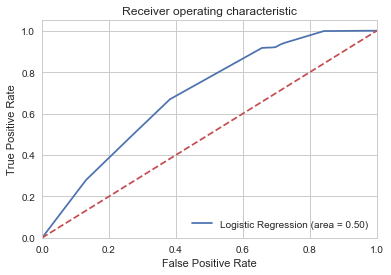

In [138]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Linear regression (all + conversion only)

tutos: http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
full process & coefficients: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

In [ ]:
training.head()

In [177]:
# On retire les non conversions
training_lin = training[training.transaction == 1]

In [178]:
# On retire les colonnes inutiles
training_lin = training_lin.drop(['(Other)', 'Direct', 'transaction', 'datediff'], 1)

training_lin.head()

,visitNumber,Affiliates,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,mobile,tablet,revenue,intercept
unique_client_id,,,,,,,,,,,,,,
17162961409513045,2,0,0,0,0,0,2,0,0,0,2,0,2024.57,1.0
3620652943798306073,1,0,0,0,0,0,0,0,0,1,0,0,492.74,1.0
6005243392405257651,1,0,0,1,0,0,0,0,0,1,0,0,550.39,1.0
8589374001495458654,1,0,0,0,0,1,0,0,0,1,0,0,558.13,1.0
3200149338845331249,1,0,0,1,0,0,0,0,0,1,0,0,721.10,1.0


In [179]:
training_lin['Email x Paid Search']=training_lin['Email'] * training_lin['Paid Search']
training_lin['Email x Organic Search']=training_lin['Email'] * training_lin['Organic Search']
training_lin['Email x Display']=training_lin['Email'] * training_lin['Display']
training_lin['Email x Social']=training_lin['Email'] * training_lin['Social']
training_lin['Email x Referral']=training_lin['Email'] * training_lin['Referral']
training_lin['Email x Local Listing']=training_lin['Email'] * training_lin['Local Listing']
training_lin['Email x Affiliates']=training_lin['Email'] * training_lin['Affiliates']
training_lin['Paid Search x Organic Search']=training_lin['Paid Search'] * training_lin['Organic Search']
training_lin['Paid Search x Display']=training_lin['Paid Search'] * training_lin['Display']
training_lin['Paid Search x Social']=training_lin['Paid Search'] * training_lin['Social']
training_lin['Paid Search x Referral']=training_lin['Paid Search'] * training_lin['Referral']
training_lin['Paid Search x Local Listing']=training_lin['Paid Search'] * training_lin['Local Listing']
training_lin['Paid Search x Affiliates']=training_lin['Paid Search'] * training_lin['Affiliates']
training_lin['Organic Search x Display']=training_lin['Organic Search'] * training_lin['Display']
training_lin['Organic Search x Social']=training_lin['Organic Search'] * training_lin['Social']
training_lin['Organic Search x Referral']=training_lin['Organic Search'] * training_lin['Referral']
training_lin['Organic Search x Local Listing']=training_lin['Organic Search'] * training_lin['Local Listing']
training_lin['Organic Search x Affiliates']=training_lin['Organic Search'] * training_lin['Affiliates']
training_lin['Display x Social']=training_lin['Display'] * training_lin['Social']
training_lin['Display x Referral']=training_lin['Display'] * training_lin['Referral']
training_lin['Display x Local Listing']=training_lin['Display'] * training_lin['Local Listing']
training_lin['Display x Affiliates']=training_lin['Display'] * training_lin['Affiliates']
training_lin['Social x Referral']=training_lin['Social'] * training_lin['Referral']
training_lin['Social x Local Listing']=training_lin['Social'] * training_lin['Local Listing']
training_lin['Social x Affiliates']=training_lin['Social'] * training_lin['Affiliates']
training_lin['Referral x Local Listing']=training_lin['Referral'] * training_lin['Local Listing']
training_lin['Referral x Affiliates']=training_lin['Referral'] * training_lin['Affiliates']
training_lin['Local Listing x Affiliates']=training_lin['Local Listing'] * training_lin['Affiliates']
training_lin['Email x desktop']=training_lin['Email'] * training_lin['desktop']
training_lin['Email x tablet']=training_lin['Email'] * training_lin['tablet']
training_lin['Email x mobile']=training_lin['Email'] * training_lin['mobile']
training_lin['Paid Search x desktop']=training_lin['Paid Search'] * training_lin['desktop']
training_lin['Paid Search x tablet']=training_lin['Paid Search'] * training_lin['tablet']
training_lin['Paid Search x mobile']=training_lin['Paid Search'] * training_lin['mobile']
training_lin['Organic Search x desktop']=training_lin['Organic Search'] * training_lin['desktop']
training_lin['Organic Search x tablet']=training_lin['Organic Search'] * training_lin['tablet']
training_lin['Organic Search x mobile']=training_lin['Organic Search'] * training_lin['mobile']
training_lin['Display x desktop']=training_lin['Display'] * training_lin['desktop']
training_lin['Display x tablet']=training_lin['Display'] * training_lin['tablet']
training_lin['Display x mobile']=training_lin['Display'] * training_lin['mobile']
training_lin['Social x desktop']=training_lin['Social'] * training_lin['desktop']
training_lin['Social x tablet']=training_lin['Social'] * training_lin['tablet']
training_lin['Social x mobile']=training_lin['Social'] * training_lin['mobile']
training_lin['Referral x desktop']=training_lin['Referral'] * training_lin['desktop']
training_lin['Referral x tablet']=training_lin['Referral'] * training_lin['tablet']
training_lin['Referral x mobile']=training_lin['Referral'] * training_lin['mobile']
training_lin['Local Listing x desktop']=training_lin['Local Listing'] * training_lin['desktop']
training_lin['Local Listing x tablet']=training_lin['Local Listing'] * training_lin['tablet']
training_lin['Local Listing x mobile']=training_lin['Local Listing'] * training_lin['mobile']
training_lin['Affiliates x desktop']=training_lin['Affiliates'] * training_lin['desktop']
training_lin['Affiliates x tablet']=training_lin['Affiliates'] * training_lin['tablet']
training_lin['Affiliates x mobile']=training_lin['Affiliates'] * training_lin['mobile']

In [180]:
training_lin=training_lin.sort_values(['revenue'], ascending=True)
training_lin.head()
# in case i need to convert: training_lin['revenue'] = training_lin[['revenue']].astype(int)

,visitNumber,Affiliates,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,...,Social x mobile,Referral x desktop,Referral x tablet,Referral x mobile,Local Listing x desktop,Local Listing x tablet,Local Listing x mobile,Affiliates x desktop,Affiliates x tablet,Affiliates x mobile
unique_client_id,,,,,,,,,,,,,,,,,,,,,
1911645835647287477,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
879902684358620538,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
247801515498859410,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7957094746111623085,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3790853559912544046,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [181]:
training_lin_log=training_lin
training_lin_log['revenue']=np.log(training_lin['revenue']) 
training_lin_log.head()

,visitNumber,Affiliates,Display,Email,Local Listing,Organic Search,Paid Search,Referral,Social,desktop,...,Social x mobile,Referral x desktop,Referral x tablet,Referral x mobile,Local Listing x desktop,Local Listing x tablet,Local Listing x mobile,Affiliates x desktop,Affiliates x tablet,Affiliates x mobile
unique_client_id,,,,,,,,,,,,,,,,,,,,,
1911645835647287477,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
879902684358620538,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
247801515498859410,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7957094746111623085,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3790853559912544046,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### statsmodels - sur les conversions uniquement

In [ ]:
X = training_lin_log[["visitNumber", "Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social", "desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin_log["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


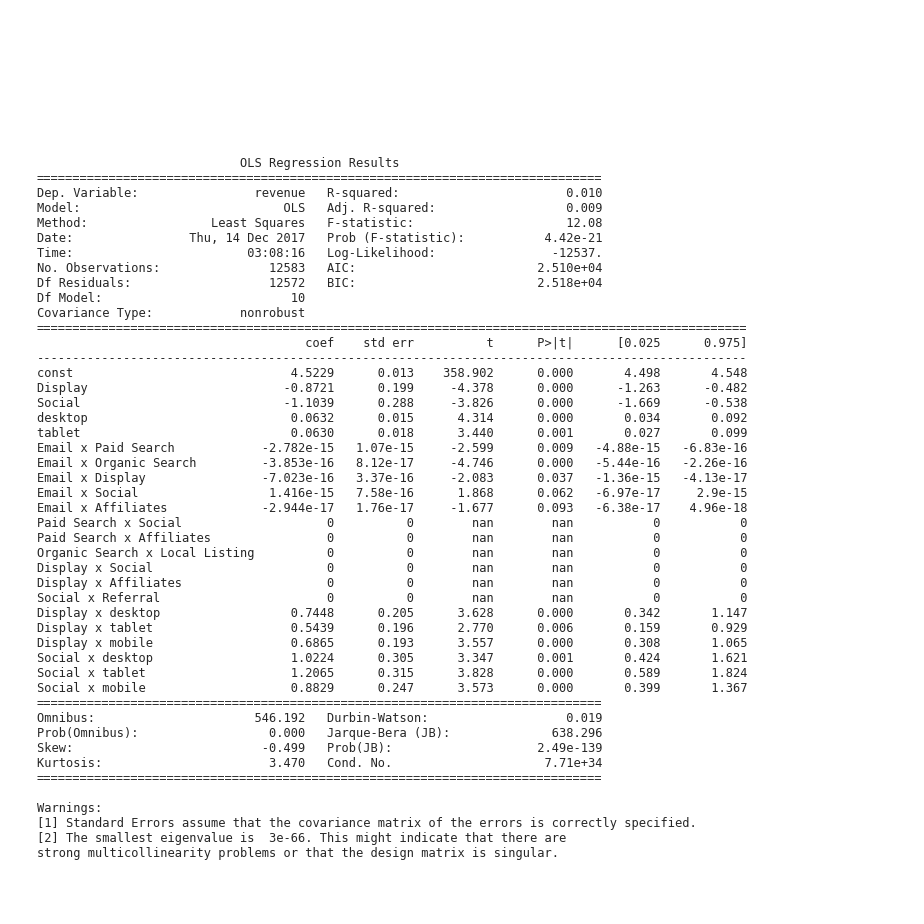

In [176]:
X = training_lin_log[[ 
"Display","Social", "desktop", "tablet","Email x Paid Search",
"Email x Organic Search",
"Email x Display",
"Email x Social",
"Email x Affiliates",
"Paid Search x Social",
"Paid Search x Affiliates",
"Organic Search x Local Listing",
"Display x Social",
"Display x Affiliates",
"Social x Referral",
"Display x desktop",
"Display x tablet",
"Display x mobile",
"Social x desktop",
"Social x tablet",
"Social x mobile"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()


import matplotlib.pyplot as plt
plt.rc('figure', figsize=(13, 13))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')


In [171]:
X = training_lin_log[["Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin_log["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.54
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           7.48e-15
Time:                        02:57:33   Log-Likelihood:                -12555.
No. Observations:               12583   AIC:                         2.513e+04
Df Residuals:                   12574   BIC:                         2.520e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5538      0.011    412.

In [155]:
X = training_lin[["desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.21
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           3.07e-09
Time:                        00:25:09   Log-Likelihood:                -12576.
No. Observations:               12583   AIC:                         2.516e+04
Df Residuals:                   12579   BIC:                         2.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3389      0.061     70.599      0.0

In [153]:
X = training_lin_log[["desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin_log["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     14.21
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           3.07e-09
Time:                        00:24:11   Log-Likelihood:                -12576.
No. Observations:               12583   AIC:                         2.516e+04
Df Residuals:                   12579   BIC:                         2.519e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3389      0.061     70.599      0.0

In [ ]:
X = training_lin[["Affiliates", "Email", "Organic Search", "Paid Search"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["Local Listing", "Organic Search", "Paid Search"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin[["Affiliates", "Display", "Paid Search"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

### avec toutes les observations

In [ ]:
# On retire les colonnes inutiles
training_lin2 = training.drop(['(Other)', 'Direct', 'transaction', 'datediff'], 1)

training_lin2.head()

In [ ]:
X = training_lin2[["visitNumber", "Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social", "desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin2["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin2[["Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin2["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
X = training_lin2[["desktop", "mobile", "tablet"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin2["revenue"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

### sklearn

In [ ]:
# On retire les colonnes inutiles
training_lin3 = training.drop(['(Other)', 'Direct', 'transaction', 'datediff'], 1)

training_lin3.head()

In [ ]:
names=[i for i in list (training_lin3)]
names

In [ ]:
X = training_lin3[["Affiliates", "Display", "Email", "Local Listing", "Organic Search", "Paid Search",
                 "Referral", "Social"]]
X = sm.add_constant(X) # another way to add a constant row for an intercept
y =  training_lin3["revenue"]


In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
print (regressor.intercept_, regressor.coef_)

In [ ]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

In [ ]:
print('Variance score: %.2f' % regressor.score(X_test, y_test))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use("bmh")
plt.scatter(regressor.predict(X_test),y_test)
plt.show()

# Survival Analysis

In [ ]:
import sksurv

In [ ]:
from sksurv.datasets import load_veterans_lung_cancer

data_x, data_y = load_veterans_lung_cancer()
data_y

In [ ]:
import pandas as pd

pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

In [ ]:
pd.DataFrame.dtypes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["Status"], data_y["Survival_in_days"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [ ]:
## Survival analysis

# On retire les colonnes inutiles
training_surv = training.drop(['(Other)', 'Direct', 'visitNumber'], 1)

training_surv.head()

In [ ]:
training_surv['transaction'] = np.where(training_surv['transaction']==1, 'True', 'False')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(training_surv["transaction"], training_surv["datediff"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

# Markov Chains [R integration to validate]

In [ ]:
#Markov chains
idx_client = df['unique_client_id'].drop_duplicates() 
mkv_df = pd.DataFrame(columns = ['unique_client_id', 'path', 'device', 'revenue', 'revInd'], index=idx_client)
chn_grp = ''
dev_grp = ''
ant_kid = ''
idx = 0
for index, row in df.iterrows():
    if idx == row['cnt_key'] and idx == 1:
            mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
            'path' : row['channelgrouping'], 
            'device' : row['device'], 
            'revenue' : row['revenue'],                        
            'revInd' : row['revenue_ind']}, ignore_index=True)
            idx = idx-1
            #print(idx, 'test 1')
    elif idx > 1:
        if row['revenue_ind'] == 0:
            if chn_grp == '' and dev_grp == '':
                dev_grp = row['device']
                chn_grp = row['channelgrouping']
                #print(idx, 'test 2', row['revenue_ind'])
                idx = idx-1
            elif chn_grp == '':
                chn_grp = row['channelgrouping']
                #print(idx, 'test 4')
                idx = idx-1
            elif dev_grp == '':
                dev_grp = row['device']
                #print(idx, 'test 4')
                idx = idx-1
            elif chn_grp != '' and dev_grp != '':
                chn_grp = chn_grp + ' > ' + row['channelgrouping']
                dev_grp = dev_grp + ' > ' + row['device']                
                #print(idx, 'test 5')
                idx = idx-1
            
        elif row['revenue_ind'] == 1:
            chn_grp = chn_grp + ' > ' + row['channelgrouping']
            dev_grp = dev_grp + ' > ' + row['device']
            mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
            'path' : chn_grp, 
            'device' : dev_grp, 
            'revenue' : row['revenue'],   
            'revInd' : row['revenue_ind']}, ignore_index=True)
            chn_grp = ''
            dev_grp = ''
            #print(idx, 'test 9')
            idx = idx-1    
    elif idx == 1:
        mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
        'path' : chn_grp, 
        'device' : dev_grp, 
        'revInd' : row['revenue_ind']}, ignore_index=True)
        chn_grp = ''
        dev_grp = ''
        idx = idx-1
        #print(idx, 'test 10')
    elif idx == 0:
        idx = row['cnt_key']
        ant_kid = row['unique_client_id']
    
        if row['revenue_ind'] == 0:
            if chn_grp == '' and dev_grp == '':
                dev_grp = row['device']
                chn_grp = row['channelgrouping']
                #print(idx, 'test 2', row['revenue_ind'])
                idx = idx-1
            elif chn_grp == '':
                chn_grp = row['channelgrouping']
                idx = idx-1
                #print(idx, 'test 3')
            elif dev_grp == '':
                dev_grp = row['device']
                idx = idx-1
                #print(idx, 'test 4')
            elif chn_grp != '' and dev_grp != '':
                chn_grp = chn_grp + ' > ' + row['channelgrouping']
                dev_grp = dev_grp + ' > ' + row['device']                
                #print(idx, 'test 5', row['revenue_ind'])
                idx = idx-1
            
        elif row['revenue_ind'] == 1:
            chn_grp = str(chn_grp + ' > ' + row['channelgrouping'])
            dev_grp = dev_grp + ' > ' + row['device']
            mkv_df = mkv_df.append({'unique_client_id' : row['unique_client_id'],
            'path' : chn_grp, 
            'device' : dev_grp, 
            'revenue' : row['revenue'],   
            'revInd' : row['revenue_ind']}, ignore_index=True)
            chn_grp = ''
            dev_grp = ''
            idx = idx-1
            #print(idx, 'test 9')
mkv_df['path'] = mkv_df['path'].str.replace("Direct", "").str.replace("Others", "")
mkv_df = mkv_df.drop_duplicates()

print(mkv_df)

In [ ]:
## Linear regression model - Train and build 
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Calculate R-Square
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

# Compute Root square mean error (RSME)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# Compute absolute MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)